# Map (series) inversion
(by Dario Izzo)

In this notebook we show how to use the map inversion algorithm to locally invert systems of non linear equations. 

## Importing stuff

In [1]:
from pyaudi import gdual_double as gdual
from pyaudi import sin, cos
from pyaudi import invert_map

## The Double Pendulum end-point


Let us consider, in 2D, the end point position of a double pendulum.

$$
x = l_1 sin(\theta_1) + l_2 sin(\theta_2) \\
y = -l_1 cos(\theta_1) - l_2 cos(\theta_2) 
$$

We will develop a model for the inversion of this system of equations, so that $\theta_1$ and $\theta_2$ can be expressed as a function of $x$ and $y$


In [2]:
# We show an image for clarity
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.physicsandbox.com/assets/images/pendulum.jpg")

### Define our variables

In [3]:
# Lengths for the pendulum arms
L1 = 1.
L2 = 1.3
# Nominal values for thetas
th1n = 0.3
th2n = -0.2
# Gduals (high order)
th1 = gdual(th1n, "\\theta_1", 11)
th2 = gdual(th2n, "\\theta_2", 11)
# Equations
x = L1*sin(th1)+L2*sin(th2)
y = -L1*cos(th1)-L2*cos(th2)

In [4]:
# Lets visualize the Taylor polinomial expansion for x
x

1.27409*d\theta_2+2.63265e-06*d\theta_1**9-0.000410445*d\theta_1**6+3.51104e-06*d\theta_2**9-0.159223*d\theta_1**3+0.0372501+0.000358709*d\theta_2**6-0.000252795*d\theta_2**7-0.212348*d\theta_2**3-2.39332e-08*d\theta_1**11+7.32937e-06*d\theta_1**8+0.00796114*d\theta_1**5-0.0107613*d\theta_2**4-0.14776*d\theta_1**2+0.0106174*d\theta_2**5-8.14374e-08*d\theta_1**10-6.40551e-06*d\theta_2**8-0.000189551*d\theta_1**7+0.0123133*d\theta_1**4+0.955336*d\theta_1+...

In [5]:
# Lets visualize the Taylor polinomial expansion for y
y

-0.25827*d\theta_2+8.14374e-07*d\theta_1**9+0.00132686*d\theta_1**6-7.11723e-07*d\theta_2**9-0.0492534*d\theta_1**3-2.22942+0.00176956*d\theta_2**6+5.12441e-05*d\theta_2**7+0.043045*d\theta_2**3-7.4034e-09*d\theta_1**11-2.36939e-05*d\theta_1**8+0.00246267*d\theta_1**5-0.0530869*d\theta_2**4+0.477668*d\theta_1**2-0.00215225*d\theta_2**5+2.63265e-07*d\theta_1**10-3.15994e-05*d\theta_2**8-5.8635e-05*d\theta_1**7-0.0398057*d\theta_1**4+0.29552*d\theta_1+...

### Compute the inverse map

In [6]:
# And let us invert the relationship
res = invert_map([x,y])
th1_map = res[0]
th2_map = res[1]

In [7]:
# Lets visualize the Taylor polinomial expansion for th1
th1_map

-33.3889*dp0**2*dp1**2+2.97638*dp0**2*dp1-1.53985e+08*dp0**2*dp1**8+7.49742*dp0**4*dp1-1.18854*dp0**8-450.043*dp1**4-0.461981*dp0**2-60579.9*dp0*dp1**6+13499.7*dp0**7*dp1**3-19.2519*dp0**3*dp1**2+4.30881e+06*dp0**6*dp1**5+1.03732*dp0**3*dp1-2.89428e+08*dp0**3*dp1**8+4.30674*dp0**5*dp1-0.913559*dp0**9+7.34785e+07*dp1**9-5141.9*dp0**3*dp1**4-0.0793933*dp0**3-45079.9*dp0**5*dp1**4-47904.3*dp1**6+...

In [8]:
# Lets visualize the Taylor polinomial expansion for th2
th2_map

25.7695*dp0**2*dp1**2-2.34715*dp0**2*dp1+1.18575e+08*dp0**2*dp1**8-5.78329*dp0**4*dp1+0.917051*dp0**8+347.27*dp1**4+0.343531*dp0**2+46667.1*dp0*dp1**6-10399*dp0**7*dp1**3+14.7909*dp0**3*dp1**2-3.3184e+06*dp0**6*dp1**5-0.872053*dp0**3*dp1+2.22845e+08*dp0**3*dp1**8-3.30875*dp0**5*dp1+0.704389*dp0**9-5.65823e+07*dp1**9+3962.12*dp0**3*dp1**4+0.00876767*dp0**3+34726*dp0**5*dp1**4+36914.5*dp1**6+...

### Compute $\theta$ from $x$

In [9]:
# First we extract the x,y position around the nominal thetas
xn = x.constant_cf
yn = y.constant_cf

In [10]:
print("x nominal is: ", xn)
print("y nominal is: ", yn)

x nominal is:  0.037250076627759976
y nominal is:  -2.22942304031922


In [11]:
# Lets assume some desired (close to nominal) values for the end point
xd = 0.04
yd = -2.21
# And compute the change with respect to the nominal position
dx = xd - xn
dy = yd - yn
# We now compute the thetas
th1d = th1n + th1_map.evaluate({"dp0": dx, "dp1": dy})
th2d = th2n + th2_map.evaluate({"dp0": dx, "dp1": dy})
# Let us check that indeed they are producing the desired end point position
xdi = L1*sin(th1d)+L2*sin(th2d)
ydi = -L1*cos(th1d)-L2*cos(th2d)

In [12]:
print("Error in x: ", xdi-xd)
print("Error in y: ", ydi-yd)

Error in x:  -9.838373171699999e-12
Error in y:  1.7152856912616699e-10


In [13]:
ydi

-2.2099999998284714

## The Kepler's Equation

Let's consider the long standing problem of inverting Kepler's equation:

$$
M = E - e sin(E)
$$

and face it using the map inversion functionality of pyaudi

### Define our variables

In [14]:
# Nominal values (expansion points) for eccentric anomaly and eccentricity
En = 0
en = 0
# gduals
E = gdual(En, "E", 11)
e = gdual(en, "e", 11)
# The equation
M = E - e*sin(E)

In [15]:
# Lets visualize the Taylor polinomial expansion for M (mean anomaly)
M

dE-0.00833333*dE**5*de+0.000198413*dE**7*de-dE*de-2.75573e-06*dE**9*de+0.166667*dE**3*de

### Invert the map

In [16]:
# We need to have the same symbol set in the variables
e.extend_symbol_set(["de", "dE"])
# We may now create the inverse map
res = invert_map([M, e])
E_map = res[0]
e_map = res[1]

In [17]:
# Lets visualize the Taylor polinomial expansion for E as a function of M (p0) and e (p1)
E_map

-20*dp0**3*dp1**8+0.00833333*dp0**5*dp1-3.33333*dp0**3*dp1**4+2.8*dp0**5*dp1**4+0.133333*dp0**5*dp1**2+dp0*dp1**10-1.66667*dp0**3*dp1**3+0.758333*dp0**5*dp1**3+0.000705467*dp0**9*dp1**2+dp0*dp1**8-0.000198413*dp0**7*dp1+2.75573e-06*dp0**9*dp1-1.07937*dp0**7*dp1**4-0.0126984*dp0**7*dp1**2+dp0*dp1**6+dp0*dp1**2-14*dp0**3*dp1**7+8.05*dp0**5*dp1**5-0.162698*dp0**7*dp1**3-5.83333*dp0**3*dp1**5+...

### Compute $E$ from $M$

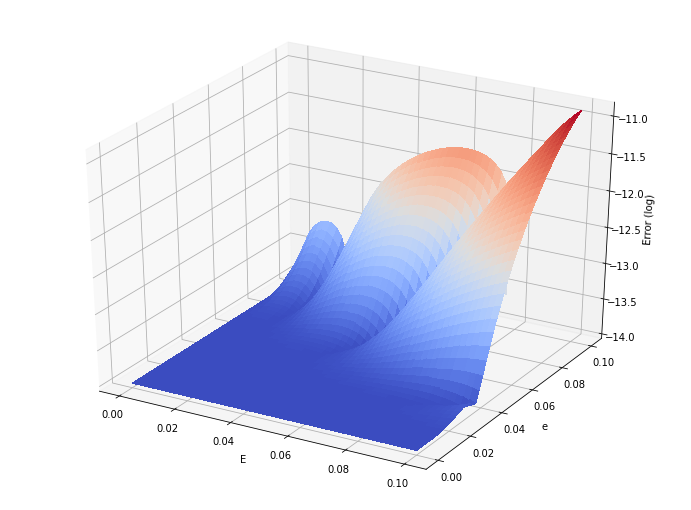

In [18]:
# We now investigate how accurate this map is around the nominal point
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

N = 50
M_grid = np.linspace(0,0.1,N)
e_grid = np.linspace(0,0.1,N)
# Make data.
X, Y = np.meshgrid(M_grid, e_grid)
Z = np.zeros([N,N])
for i in range(N):
    for j in range(N):
         res = E_map.evaluate({"dp0": X[i,j], "dp1": Y[i,j]}) + En
         Z[i,j] = np.log10(np.abs(X[i,j] - res + Y[i,j]*sin(res)) + 1e-14)

# Prepare the plot
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('E')
ax.set_ylabel('e')
ax.set_zlabel('Error (log)')
plt.show()
